In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X_2d = X[:, :2]

#Consider 0 & 1 class
X_2d = X_2d[y < 2]
y_2d = y[y < 2]
y_2d = np.where(y_2d == 1, 1, -1)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d_1 = scaler.fit_transform(X_2d)

In [6]:
np.mean(X_2d_1[y_2d==1],axis=0)

array([ 0.72829015, -0.69068434])

In [7]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

clf1 = NearestCentroid()
clf1.fit(X_2d_1, y_2d)
print(clf1.centroids_)

[[-0.72829015  0.69068434]
 [ 0.72829015 -0.69068434]]


C:\Users\i49ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
A = np.array([ -0.73,0.69 ])
B = np.array([ 0.73, -0.69 ])
C=np.array([[-0.73,0.69],[0.73, -0.69]])
import math
distance = math.sqrt( ((A[0]-B[0])**2)+((A[1]-B[1])**2) )
distance

2.008979840615629

In [9]:
A1=np.full(X_2d_1.shape,A)
A1.shape

B1=np.full(X_2d_1.shape,B)
B1.shape

(100, 2)

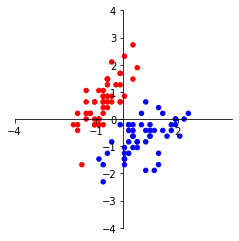

In [10]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
xmin,xmax=-4,4
ax.set_xlim([xmin,xmax])
ax.set_ylim([xmin,xmax])

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#make the box square shape
ax.set_aspect('equal')

ax.scatter(X_2d_1[:, 0], X_2d_1[:, 1], marker="o", s=20,color=["r" if y_2d == -1 else "b" for y_2d in y_2d])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3.0))

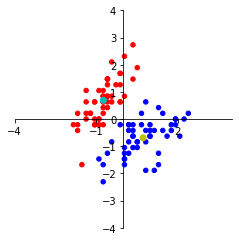

In [11]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
xmin,xmax=-4,4
ax.set_xlim([xmin,xmax])
ax.set_ylim([xmin,xmax])

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#make the box square shape
ax.set_aspect('equal')

ax.scatter(X_2d_1[:, 0], X_2d_1[:, 1], marker="o", s=20,color=["r" if y_2d == -1 else "b" for y_2d in y_2d])
ax.scatter(C[:,0],C[:,1],marker="o",color="cy")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3.0))

In [12]:
np.var(X_2d_1[y_2d==1],axis=0)

array([0.6404961 , 0.42529936])

In [13]:
np.var(X_2d_1[y_2d==-1],axis=0)

array([0.29869082, 0.62061093])

In [14]:
def point_on_line(a, b, p):
    ap = p - a
    ab = b - a
    result = a + np.dot(ap, ab) / np.dot(ab, ab) * ab
    return result

X_2d_1_projected=[]
for i in range(X_2d_1.shape[0]):
    projected_neg = point_on_line(A1[i], B1[i], X_2d_1[i]) 
    X_2d_1_projected.append(projected_neg)
    #print(projected_neg)

In [15]:
X_2d_1_projected=np.array(X_2d_1_projected)
X_2d_1_projected[0:5]

array([[-0.72713913,  0.68729589],
       [-0.36857355,  0.34837774],
       [-0.74361339,  0.70286745],
       [-0.72153176,  0.68199577],
       [-0.91465905,  0.86454075]])

[<matplotlib.axis.XTick at 0x9ef8048>, <matplotlib.axis.XTick at 0xaf26cc8>]

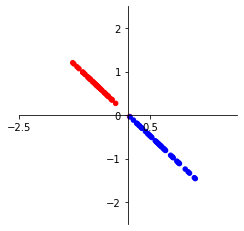

In [16]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
xmin,xmax=-2.5,2.5
ax.set_xlim([xmin,xmax])
ax.set_ylim([xmin,xmax])

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#make the box square shape
ax.set_aspect('equal')

ax.scatter(X_2d_1_projected[:, 0], X_2d_1_projected[:, 1], marker="o", s=20,color=["r" if y_2d == -1 else "b" for y_2d in y_2d])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3.0))
#plt.title("centers=[(-3,0),(3,0)],σ=%.2f,i=%.0f"%(σ,i))
#plt.title("centers=[(-3,0),(3,0)],σ=%.2f"%σ) 
#plt.title("centers=[(-3,0),(3,0)]")

In [17]:
np.var(X_2d_1_projected[y_2d==-1],axis=0)

array([0.06939612, 0.06199942])

In [18]:
np.var(X_2d_1_projected[y_2d==1],axis=0)

array([0.13990906, 0.12499663])

In [19]:
x1=X_2d_1_projected[55][0]
x1
y1=X_2d_1_projected[55][1]
print(x1,y1)

0.5027811587959945 -0.47523150625922783


In [20]:
x2=X_2d_1_projected[56][0]
x2
y2=X_2d_1_projected[56][1]
print(x2,y2)

0.4750921542168922 -0.4490597074104872


In [21]:
slope=(y2-y1)/(x2-x1)
slope

-0.9452054794520599

In [22]:
import math
angle=(math.atan(slope))
angle_degrees=math.degrees(math.atan(slope))

print(angle)
print(angle_degrees)

-0.7572365964095585
-43.38646106711897


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
p = np.array([[x1, x2], [y1, y2]])
r = stats.linregress(p)
r.slope,math.atan(r.slope), r.intercept

(-0.9452054794520599, -0.7572365964095585, 2.4424906541753444e-15)

In [24]:
theta1 = -angle
c, s = np.cos(theta1), np.sin(theta1)
R1 = np.array(((c, -s), (s, c)))
R1

array([[ 0.72673701, -0.6869158 ],
       [ 0.6869158 ,  0.72673701]])

In [25]:
R1.dot(X_2d_1_projected[0])

array([-1.00055333e+00, -2.72004641e-15])

In [39]:
X_2d_1_projected_X=[]
for i in range(X_2d_1_projected.shape[0]):
    X_2d_1_projected_x=R1.dot(X_2d_1_projected[i])
    X_2d_1_projected_X.append(X_2d_1_projected_x)
    #print(X_2d_1_projected_x)

X_2d_1_projected_X_2=np.array(X_2d_1_projected_X)

[<matplotlib.axis.XTick at 0xb6d2cc8>, <matplotlib.axis.XTick at 0xb6afe08>]

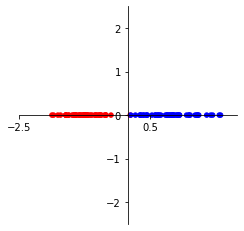

In [40]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
xmin,xmax=-2.5,2.5
ax.set_xlim([xmin,xmax])
ax.set_ylim([xmin,xmax])

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#make the box square shape
ax.set_aspect('equal')

ax.scatter(X_2d_1_projected_X_2[:, 0], X_2d_1_projected_X_2[:, 1], marker="o", s=20,color=["r" if y_2d == -1 else "b" for y_2d in y_2d])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3.0))
#plt.title("centers=[(-3,0),(3,0)],σ=%.2f,i=%.0f"%(σ,i))
#plt.title("centers=[(-3,0),(3,0)],σ=%.2f"%σ) 
#plt.title("centers=[(-3,0),(3,0)]")

In [41]:
neg_var=np.var(X_2d_1_projected_X_2[y_2d==-1],axis=0)
neg_var

array([1.31395546e-01, 9.46278836e-31])

In [42]:
pos_var=np.var(X_2d_1_projected_X_2[y_2d==1],axis=0)
pos_var

array([2.64905685e-01, 1.88332742e-30])

In [43]:
total_neg_var=np.var(X_2d_1_projected_X_2[y_2d==-1])
total_neg_var

0.3175599225109284

In [44]:
total_pos_var=np.var(X_2d_1_projected_X_2[y_2d==1])
total_pos_var

0.3843149920449248

In [45]:
sd=math.sqrt((neg_var[0]+pos_var[0])/2)
sd

0.4451411185788945

In [46]:
total_sd=math.sqrt((total_neg_var+total_pos_var)/2)
total_sd

0.5923997444951564

In [47]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance

In [49]:
X_2d_1_projected[0:5]

array([[-0.72713913,  0.68729589],
       [-0.36857355,  0.34837774],
       [-0.74361339,  0.70286745],
       [-0.72153176,  0.68199577],
       [-0.91465905,  0.86454075]])

In [50]:
import numpy as np
X_2d_1_projected_rot90=np.rot90(X_2d_1_projected[0:5])
X_2d_1_projected_rot90

array([[ 0.68729589,  0.34837774,  0.70286745,  0.68199577,  0.86454075],
       [-0.72713913, -0.36857355, -0.74361339, -0.72153176, -0.91465905]])

In [51]:
X_2d_1_projected_rot90[0:]

array([[ 0.68729589,  0.34837774,  0.70286745,  0.68199577,  0.86454075],
       [-0.72713913, -0.36857355, -0.74361339, -0.72153176, -0.91465905]])

In [17]:
np.std(X_neg_1_projected,axis=0)

array([0.26424591, 0.26052413])

In [18]:
np.var(X_pos_1_projected,axis=0)

array([0.1318272 , 0.12813991])

In [19]:
np.std(X_pos_1_projected,axis=0)

array([0.36308015, 0.35796635])

In [25]:
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd
from sklearn.metrics import hinge_loss
cols=['iteration','C','Margin','Train_hinge_loss','cost_training','Test_hinge_loss','cost_testing']
lst=[]
for i in range (1,501):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X_2d_1,y_2d,test_size=0.40,random_state=1)
    i=i
    from sklearn import metrics
    from sklearn import svm
    import numpy as np
 
    Cs= np.logspace(-1,2,1000).tolist()
 
    Cs=np.array(Cs)
    clf = svm.SVC(kernel='linear', C=Cs)
    
    #i=[]
    C=[]
    Margin=[]
    train_errors = []
    test_errors = []
    number_of_misclassified_train_points=[]
    number_of_misclassified_test_points=[]
    Train_hinge_loss=[]
    cost_training=[]
    Test_hinge_loss=[]
    cost_testing=[]
    
    #alphas=[]
    #ξs=[]
    
    #old_M=0
    #old_C=0
    #old_train=0
    #old_test=0
    #old_misclassified_train=0
    #old_misclassified_test=0

    for C in Cs:
        
        clf.set_params(C=C)
        clf.fit(X_train, y_train)
        
        #C.append(C)
        i=i
        w = clf.coef_[0]
        #Weights.append(w)
        
        y_train_predict=clf.predict(X_train)
        train_error=metrics.mean_squared_error(y_train,y_train_predict)
        train_errors.append(train_error)
        
        misclassified_train=np.where(y_train != y_train_predict)
        number_of_misclassified_train_points.append(misclassified_train)
       
        
        y_test_predict=clf.predict(X_test)
        test_error=metrics.mean_squared_error(y_test,y_test_predict)
        test_errors.append(test_error)
        
        misclassified_test=np.where(y_test != y_test_predict)
        number_of_misclassified_test_points.append(misclassified_test)
        
        pred_decision_train = clf.decision_function(X_train)
        hinge_loss_train=hinge_loss(y_train,pred_decision_train)
        Train_hinge_loss.append(hinge_loss_train)

        pred_decision_test = clf.decision_function(X_test)
        hinge_loss_test=hinge_loss(y_test,pred_decision_test)
        Test_hinge_loss.append(hinge_loss_test)
        
        cost_train=1/2* np.dot(w,w)+C* hinge_loss_train
        cost_training.append(cost_train)
        
        cost_test=1/2* np.dot(w,w)+ C*hinge_loss_test
        cost_testing.append(cost_test)
        
        #alpha=clf.dual_coef_
        #alphas.append(alpha)
        #ξ=y_train*clf.decision_function(X_train)
        #ξs.append(ξ)
        a = -w[0] / w[1]
        M= 2 / np.sqrt(np.sum(w ** 2))
        Margin.append(M)
        #if M!=old_M:
            #old_M=M
            #old_C=C
            #old_train=train_error
            #old_test=test_error
            #old_misclassified_train=len(misclassified_train[0])
            #old_misclassified_test=len(misclassified_test[0])
        #else:
            #break
        #lst.append([i,C,Margin,train_errors,number_of_misclassified_train_points,test_errors,number_of_misclassified_test_points,Train_hinge_loss,cost_training,Test_hinge_loss,cost_testing])    
        lst.append([i,C,M,hinge_loss_train,cost_train,hinge_loss_test,cost_test])    
 
    #print ('iteration=%.f'%i)
    #print (old_C,old_M)
    
    #print ("C")
    #print (Cs)
    #print ("Margin")
    #print (Margin)
    #print ("MSE_Train")
    #print (train_errors)
    #print ("MSE_Test")
    #print (test_errors)
    #print ("ξ")
    #print (ξs)
    #print ("number_of_misclassified_train_points")
    #print (number_of_misclassified_train_points)
    #print ("number_of_misclassified_test_points")
    #print (number_of_misclassified_test_points)
df = pd.DataFrame(lst, columns=cols)


In [26]:
df.to_excel (r'C:\Users\i49ahmed\Downloads\FinalTest\iris_dataset.xlsx', index = False, header=True)

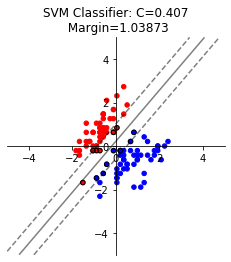

Margin= 1.0387252221


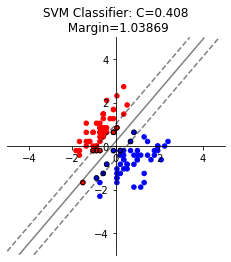

Margin= 1.0386870134


In [56]:
from sklearn import metrics
from sklearn import svm
import numpy as np
from sklearn.metrics import hinge_loss
Cs=np.arange(0.407,0.408,0.001).tolist()
Cs=np.array(Cs)
clf = svm.SVC(kernel='linear', C=Cs)


for C in Cs:
        
    clf.set_params(C=C)
    #clf.fit(X_train, y_train)
    clf.fit(X_2d_1,y_2d)   
        
    w = clf.coef_[0]
    #Weights.append(w)
        
    alpha=clf.dual_coef_
    
    #ξ=y_train*clf.decision_function(X_train)
    #ξs.append(ξ)

    M= 2 / np.sqrt(np.sum(w ** 2))

    pred_decision= clf.decision_function(X_2d_1)
    hinge_loss_train=hinge_loss(y_2d,pred_decision)
    
    a = -w[0] / w[1]
    
    plt.figure()
    plt.scatter(X_2d_1[:, 0], X_2d_1[:, 1], marker="o", s=20,color=["r" if y_2d == -1 else "b" for y_2d in y_2d])
    ax.xaxis.set_ticks(np.arange(-7, 7, 3))
# plot the decision function
    ax = plt.gca()
    ax.set_aspect('equal')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
# create grid to evaluate model
    xx = np.linspace(-5, 5, 10)
    yy = np.linspace(-5, 5, 10)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    yy = a * xx - (clf.intercept_[0]) / w[1]
    yy_down = yy - np.sqrt(1 + a ** 2) * M
    yy_up = yy + np.sqrt(1 + a ** 2) * M

        
# plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    #plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=20,
               linewidth=1, facecolors='none', edgecolors='k')    
    
    #plt.title('SVM Classifier: C=%.3f,σ=%.3f\n Margin=%.12f\n Train_hinge_loss=%.15e'%(C,σ,M,hinge_loss_train))
    plt.title('SVM Classifier: C=%.3f\n Margin=%.5f'%(C,M))
    plt.show()
    print("Margin= %.10f"%M)